In [11]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm
import pickle
from simulation.sfh_in_box import sfh, plot_sfh, plot_binned_sfh
from generate_data_moria import dump_features

In [12]:
SIMPATH = '/media/michele/My Book/Michele/MySimulations/MovingBox/np'

In [69]:
SIM = 'mb.71002'
TRAJ = 'p100_a800_r600'

In [79]:
('mb.71002'+'_p100_a800_r600').split('002_')

['mb.71', 'p100_a800_r600']

In [70]:
sim_path = os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "out")
sim = simulation.Simulation(sim_path, snap_indexes=slice(None, None, 10))

loading simulation: /media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.71002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file


In [71]:
def sigma(vel):
    return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [72]:
load_pickle = False
radius = 5
outname = '{}_{}_s{}.pickle'.format(SIM, TRAJ, radius)
if load_pickle:
    times, mass, sigma_star, sigma_gas, r_eff = pickle.load(open(outname, 'rb'))
else:
    dump_features(sim, outname, radius=radius)
    times, mass, sigma_star, sigma_gas, r_eff = pickle.load(open(outname, 'rb'))

 30%|██▉       | 17/57 [00:06<00:15,  2.52it/s]/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/array.py:532: RuntimeWarning: Mean of empty slice.
  x = np.ndarray.mean(self, *args, **kwargs)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 57/57 [00:20<00:00,  3.06it/s]


from https://arxiv.org/pdf/1901.03711v1.pdf
The dotted line is an indicative relation between stellar mass and velocity dispersion in the absence of dark matter, for
the radial regime where the dispersion profile is approximately isothermal: $\sigma \approx 5 \times 10^{-4} (M_\star/M_\odot)^{0.5}$ km/s

In [73]:
def no_dm(m):
    s = 5e-4 * (m ** 0.5)
    return s

In [74]:
no_dm(10**8.3), no_dm(10**8), no_dm(10**5)

(7.062687723113777, 5.0, 0.15811388300841897)

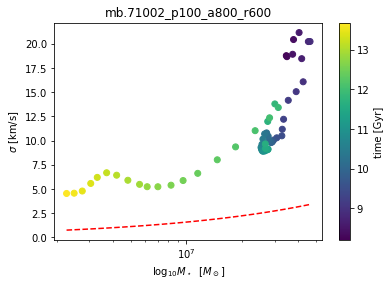

In [76]:
fig, ax = plt.subplots()
im = ax.scatter(mass, sigma_star, c=sim.times)
cbar = fig.colorbar(im)
ax.set_ylabel('$\sigma$ [km/s]')
ax.set_xlabel('$\log_{10} M_\star$  [$M_\odot$]')
cbar.ax.set_ylabel('time [Gyr]')
m = np.linspace(np.array(mass).min(), np.array(mass).max(), 100)
ax.plot(m, no_dm(m), 'r--');
ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title('{}_{}'.format(SIM, TRAJ));

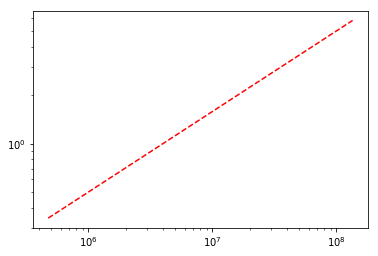

In [46]:
# fig, ax = plt.subplots()
# m = np.linspace(np.array(mass).min(), np.array(mass).max(), 100)
# ax.plot(m, no_dm(m), 'r--');
# ax.set_xscale("log")
# ax.set_yscale("log")